# Running a spin echo experiment
The first three cells here must be run first, in order, to set up the environment and start talking to the devices

# Additional GUI implementation
1. Selector for what kind of background subtraction we need to do, which selects not only the monitor function but also the measurement function.
2. Universal controls for the measurement sweeps
3. Tabs for each measurement sweep, each with its own set of inputs and output window with appropriate liveplot and fitted parameters (with appropriate exception handling to keep it from just erroring out)

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../../../pyscan-master/')

import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
import utility as ut
from time import sleep
from datetime import date, datetime
from pathlib import Path
from bimod_spinecho_gui import *
from bimod_spinecho_scripts import *
if 'devices' not in globals():
    devices = ps.ItemAttribute()
    sig = ps.ItemAttribute()
    sweep = {}

plt.rc('lines', lw=2)
plotfont = {'family': 'serif', 'size': 16}
plt.rc('font', **plotfont)
plt.rc('mathtext', fontset='cm')

wait = 0.3

controls, parameters = bimod_spinecho_gui(sig, devices, sweep)

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [35]:
controls

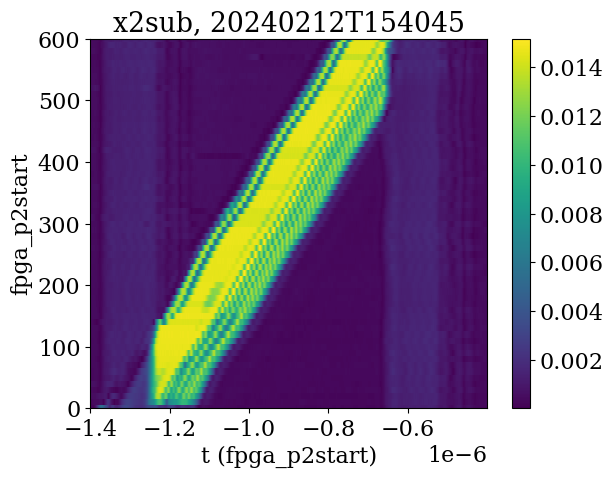

In [38]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='x2sub', transpose=1)

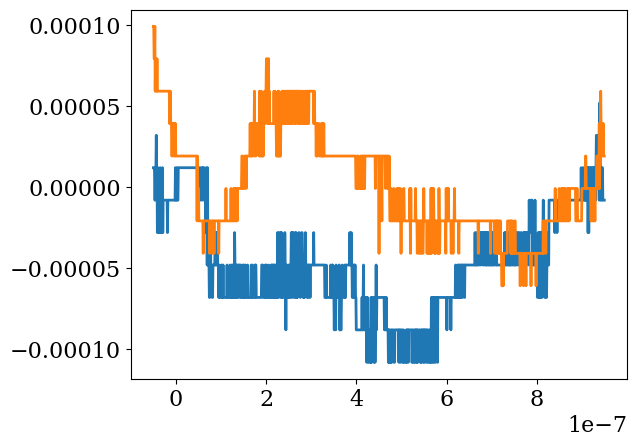

In [26]:
n = np.abs(sweep['expt'].synth_c2_freq-3876).argmin()
plt.plot(sweep['expt'].t, sweep['expt'].v1sub[n], sweep['expt'].t, sweep['expt'].v2sub[n]);

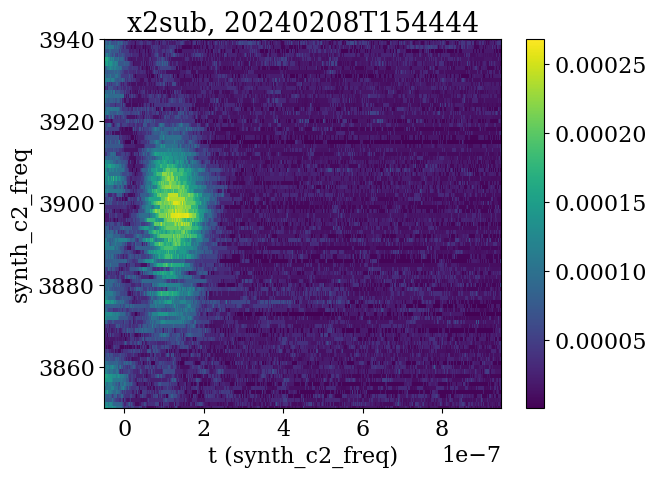

In [13]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='x2sub', transpose=1)

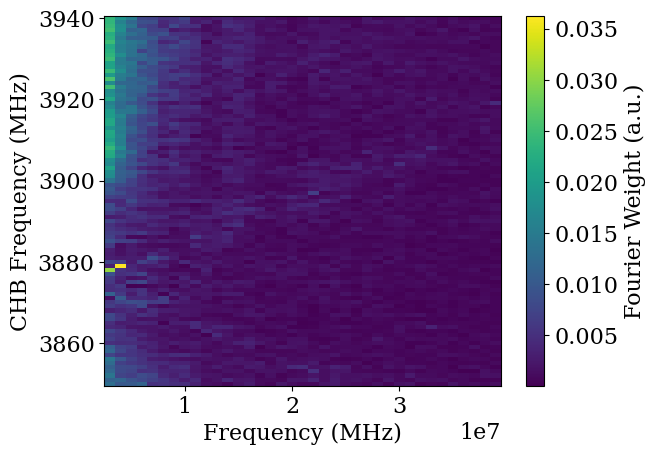

In [18]:
ut.plot_mesh(sweep['expt'].ffreqs[0][3:40], sweep['expt'][parameters['y_name']], sweep['expt'].fourier[:, 0, 3:40], xlab='Frequency (MHz)', ylab='CHB Frequency (MHz)', zlab='Fourier Weight (a.u.)');

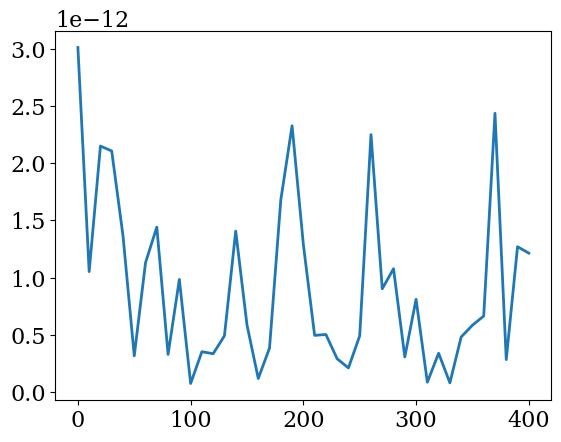

In [15]:
plt.plot(sweep['expt'][parameters['y_name']], np.abs(sweep['expt'].x2int))

# DEER

## FIRST: initialize everything in the GUI and set your sweep parameters

In [ ]:
# 2D data
runinfo = ps.RunInfo()
def change_2pulse(val):
    devices.fpga.pulse2_1 = val
    devices.fpga.pulse2_2 = val
runinfo.loop0 = ps.FunctionScan(change_2pulse, ps.drange(parameters['sweep_start'],
                                                  parameters['sweep_step'],
                                                  parameters['sweep_end']), dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .02*2*runinfo.average

runinfo.wait_time = 0.1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'DEER')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='fpga_p2start', data_name='xsub', transpose=1)

In [ ]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'fpga': ps.drange(parameters['sweep_start'],
                                                  parameters['sweep_step'],
                                                  parameters['sweep_end'])}, prop='p2start', dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .02*2*runinfo.average

runinfo.wait_time = 0.1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'DEER')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='fpga_p2start', data_name='xsub', transpose=1)

KeyboardInterrupt: 

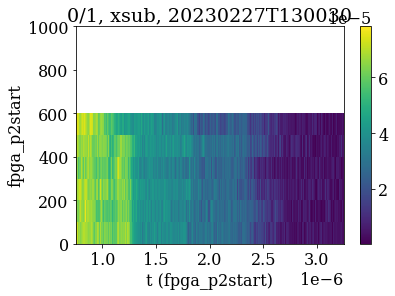

In [5]:
ps.live_plot2D(expt, x_name='t', y_name='fpga_p2start', data_name='xsub', transpose=1)

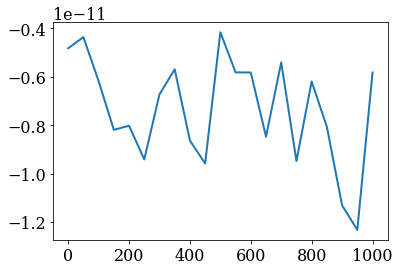

In [11]:
plt.plot(expt.fpga_p2start, expt.xint)

In [7]:
expt.runinfo.running = False